<a href="https://colab.research.google.com/github/pedroglrz/Project_Wildfire/blob/main/2022_04_14_ARISE_data_processing_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Import Data/Housekeeping

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

# 1. Import Data
## 1.1 Read Data

In [75]:
# os.makedirs()
project_directory_path = "/content/gdrive/MyDrive/2022-spring_ARISE_research/"
arise_data_path = os.path.join(project_directory_path, "data/ARISE_Data_Template_2021.csv")
school_codes_path = os.path.join(project_directory_path, "data/ny_school_codes.csv")

In [76]:
#aride df
arise_df = pd.read_csv(arise_data_path)
arise_df_working = arise_df.copy()

#school codes path
school_codes_df = pd.read_csv(school_codes_path)

In [77]:
arise_df = pd.read_csv(arise_data_path)
arise_df['Year'] = 2021
arise_df['Year'].unique()

array([2021])

## 1.2 Filter to Informative Columns

In [78]:
arise_df_working = arise_df.copy()
arise_df_working.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 63 columns):
 #   Column                                                                                                                                                                                                                            Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                            --------------  -----  
 0   Unique Identifier                                                                                                                                                                                                                 1330 non-null   int64  
 1   Year                                                                                                                       

In [79]:
#columns with more than one value
informative_columns = []
for column in arise_df_working.columns:
    if (len(arise_df_working[column].unique()) >1): #& (len(arise_df_working[column].unique()) <25):
        informative_columns.append(column)

arise_df_informative = arise_df_working[informative_columns]
arise_df_informative['Non-Degree Application Current Grade Level'] = arise_df_informative['Non-Degree Application Current Grade Level'].astype('category')        
arise_df_informative['Non-Degree Application Prior NYU Application'] = arise_df_informative['Non-Degree Application Prior NYU Application'].astype('category')

arise_df_informative
arise_df_informative.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 32 columns):
 #   Column                                            Non-Null Count  Dtype   
---  ------                                            --------------  -----   
 0   Unique Identifier                                 1330 non-null   int64   
 1   Non-Degree Application SIS Decision               768 non-null    object  
 2   App Started Date                                  1329 non-null   object  
 3   App Submitted Date                                768 non-null    object  
 4   Race                                              992 non-null    object  
 5   Hispanic                                          893 non-null    object  
 6   Non-Degree Application Cultural Identity          823 non-null    object  
 7   Non-Degree Application Cultural Identity Other    43 non-null     object  
 8   Sex                                               1170 non-null   object  
 9   Gender I

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


# 2. Feature Preprocessing


## 2.1 'Non-Degree Application SIS Decision'

- Map Nan to "Incomplete"
- Create new "decision" column

In [80]:
def standardize_row(row):
  if isinstance(row,str):
    row = row.replace(' ','_').lower()
  # row = re.sub('[^A-Za-z0-9]+', '', row)
    return row
  else:
    return row

In [81]:
arise_df_informative_working = arise_df_informative.copy()


arise_df_informative_working['std_decision'] = arise_df_informative_working['Non-Degree Application SIS Decision']
arise_df_informative_working['std_decision'] = arise_df_informative_working['std_decision'].fillna('Incomplete')
arise_df_informative_working['std_decision'] = arise_df_informative_working['std_decision'].apply(lambda row: standardize_row(row))

arise_df_informative = arise_df_informative_working.copy()

In [82]:
arise_df_informative_working['std_decision'].value_counts()

deny                        651
incomplete                  562
matriculated                 63
withdrawn                    53
withdrawn_after_decision      1
Name: std_decision, dtype: int64

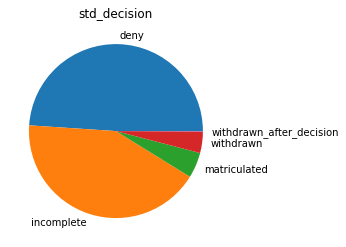

In [83]:
#plot pie
feature = 'std_decision'
plt.pie(arise_df_informative[feature].value_counts(dropna=False), labels = arise_df_informative[feature].value_counts(dropna=False).index)
plt.title(feature)
plt.show()

## 2.2 'App Started Date'/'App Submitted Date'

- Change To Date-Time In Place

In [84]:
# arise_df_informative['App Started Date'].info()#.value_counts(dropna=False)
arise_df_informative_working = arise_df_informative.copy()
arise_df_informative_working['std_app_start_date'] = arise_df_informative_working['App Started Date'].astype('datetime64[ns]')
arise_df_informative_working['std_app_submitted_date'] = arise_df_informative_working['App Submitted Date'].astype('datetime64[ns]')

arise_df_informative = arise_df_informative_working.copy()

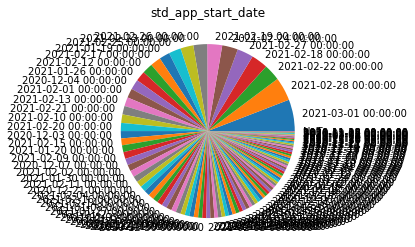

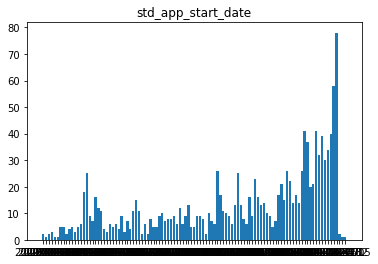

In [85]:
#plot pie
feature = 'std_app_start_date'
plt.pie(arise_df_informative[feature].value_counts(dropna=False), labels = arise_df_informative[feature].value_counts(dropna=False).index)
plt.title(feature)
plt.show()

plt.bar(arise_df_informative[feature].value_counts(dropna=False).sort_index().index.astype(str),arise_df_informative[feature].value_counts(dropna=False).sort_index())
plt.title(feature)
plt.show()

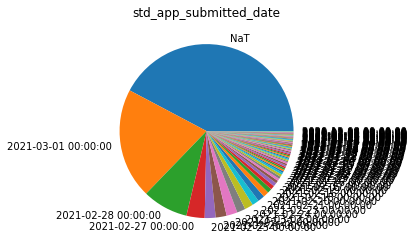

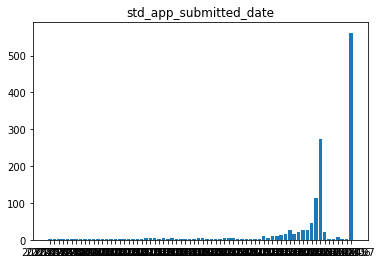

In [86]:
#plot pie
feature = 'std_app_submitted_date'
plt.pie(arise_df_informative[feature].value_counts(dropna=False), labels = arise_df_informative[feature].value_counts(dropna=False).index)
plt.title(feature)
plt.show()

plt.bar(arise_df_informative[feature].value_counts(dropna=False).sort_index().index.astype(str),arise_df_informative[feature].value_counts(dropna=False).sort_index())
plt.title(feature)
plt.show()

## 2.2 'Race'

- standardard race in "race_std" by choosing 6 racial categories:
  - White
  - Black or African American
  - American Indian or Alsak Native
  - Asian
  - Two or More, Other
  - Nan --> No Response

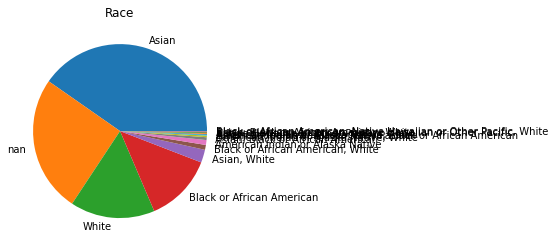

In [87]:
#plot pie
feature = 'Race'
plt.pie(arise_df_informative[feature].value_counts(dropna=False), labels = arise_df_informative[feature].value_counts(dropna=False).index)
plt.title(feature)
plt.show()

In [88]:
arise_df_informative[feature].value_counts(dropna=False)

Asian                                                                 536
NaN                                                                   338
White                                                                 209
Black or African American                                             169
Asian, White                                                           32
Black or African American, White                                       12
American Indian or Alaska Native                                       12
Asian, Black or African American                                        7
American Indian or Alaska Native, White                                 4
American Indian or Alaska Native, Black or African American             2
Asian, Native Hawaiian or Other Pacific                                 2
American Indian or Alaska Native, Asian                                 2
Native Hawaiian or Other Pacific                                        2
Black or African American, Native Hawa

In [114]:
arise_df_informative_working = arise_df_informative.copy()

arise_df_informative_working['std_race'] = arise_df_informative_working['Race']


arise_df_informative_working.loc[~arise_df_informative_working['std_race'].isin([
                                    'White',
                                    'Black or African American',
                                    'American Indian or Alaska Native',
                                    'Asian',
                                    float('nan')]),'std_race'] = 'Two or More'
arise_df_informative_working['std_race'] = arise_df_informative_working['std_race'].apply(lambda row: standardize_row(row))
arise_df_informative = arise_df_informative_working.copy()

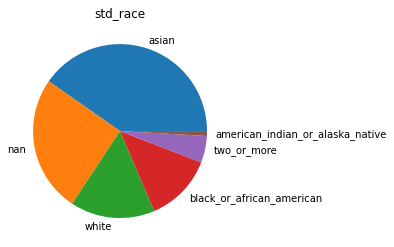

In [115]:
#plot pie
feature = 'std_race'
plt.pie(arise_df_informative[feature].value_counts(dropna=False), labels = arise_df_informative[feature].value_counts(dropna=False).index)
plt.title(feature)
plt.show()

## 2.3 'Hispanic'

- No change

In [121]:
arise_df_informative_working = arise_df_informative.copy()

arise_df_informative_working['std_hispanic'] = arise_df_informative_working['Hispanic']
arise_df_informative_working['std_hispanic'] = arise_df_informative_working['std_hispanic'].apply(lambda row: standardize_row(row))
arise_df_informative = arise_df_informative_working.copy()

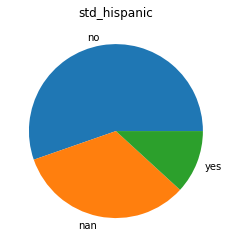

In [123]:
#plot pie
feature = 'std_hispanic'
plt.pie(arise_df_informative[feature].value_counts(dropna=False), labels = arise_df_informative[feature].value_counts(dropna=False).index)
plt.title(feature)
plt.show()

## 2.4 'Cultural Identity'
- Find all unique "Cultural Inditiy Categories seperated by commas
- One hot encode each catagory in its own unique column


In [124]:
#define list of cultural identity catagories
arise_df_informative_working = arise_df_informative.copy()
cultural_id_other_list = list(arise_df_informative_working['Non-Degree Application Cultural Identity Other'].value_counts(dropna=False).index)
cultural_id_list = list(arise_df_informative_working['Non-Degree Application Cultural Identity'].value_counts(dropna=False).index)
cultural_id_list
cultural_id_split_list = []
for i in cultural_id_list:
  if isinstance(i, str):
    split = i.split(',')
    for category in split:
      cultural_id_split_list.append(category.strip())
  else:
    cultural_id_split_list.append(i)
cultural_id_split_list = list(set(cultural_id_split_list))

In [125]:
oh_culture_id_list = []
for culture in cultural_id_split_list:
  if isinstance(culture, str):
    culture = "oh_cultural_id_" + culture.lower().replace(' ', '_')
  else:
    culture = 'oh_cultural_id_nan'
  oh_culture_id_list.append(culture)
oh_culture_id_list

['oh_cultural_id_nan',
 'oh_cultural_id_southeast_asian_origin',
 'oh_cultural_id_puerto_rican_origin',
 'oh_cultural_id_central_american_origin',
 'oh_cultural_id_african_origin',
 'oh_cultural_id_hawiian_origin',
 'oh_cultural_id_afro-caribbean_origin',
 'oh_cultural_id_pacific_island_origin',
 'oh_cultural_id_indian_subcontinent_origin',
 'oh_cultural_id_north_african_origin',
 'oh_cultural_id_east_asian_origin',
 'oh_cultural_id_other',
 'oh_cultural_id_mexican_origin',
 'oh_cultural_id_prefer_not_to_say',
 'oh_cultural_id_south_asian',
 'oh_cultural_id_south_american_origin',
 'oh_cultural_id_european_origin',
 'oh_cultural_id_middle_eastern_origin',
 'oh_cultural_id_cuban_origin',
 'oh_cultural_id_north_american_(native_american)_origin']

In [126]:
# definite by row functions
def split_cultural_id(string):
  split_list = []
  if isinstance(string, str):
    split = string.split(',')
    for category in split:
      split_list.append(category.strip())
  else:
    split_list.append(string)
  return split_list

def cultural_od_isin(culture, culture_list):
  if isinstance(culture_list[0], str):
    if culture in (culture_list):
      return 1
    else:
      return 0
  else:
    return culture_list[0]

In [127]:
arise_df_informative_cultrual_id = arise_df_informative.copy()
arise_df_informative_cultrual_id['std_cultural_id'] = arise_df_informative_cultrual_id['Non-Degree Application Cultural Identity'].apply(split_cultural_id)
arise_df_informative_cultrual_id['std_cultural_id']

for culture in cultural_id_split_list:
  if isinstance(culture, str):
    feature = "oh_cultural_id_" + culture.lower().replace(' ', '_')
  else:
    feature = 'oh_cultural_id_nan'
  arise_df_informative_cultrual_id[feature] = arise_df_informative_cultrual_id['std_cultural_id']
  arise_df_informative_cultrual_id[feature] = arise_df_informative_cultrual_id[feature].apply(lambda row: cultural_od_isin(culture, row))
  if feature != 'oh_cultural_id_nan':
    arise_df_informative_cultrual_id[feature] = arise_df_informative_cultrual_id[feature].fillna(0)


arise_df_informative_cultrual_id.oh_cultural_id_nan = arise_df_informative_cultrual_id.oh_cultural_id_nan.fillna(1)
arise_df_informative = arise_df_informative_cultrual_id.copy()

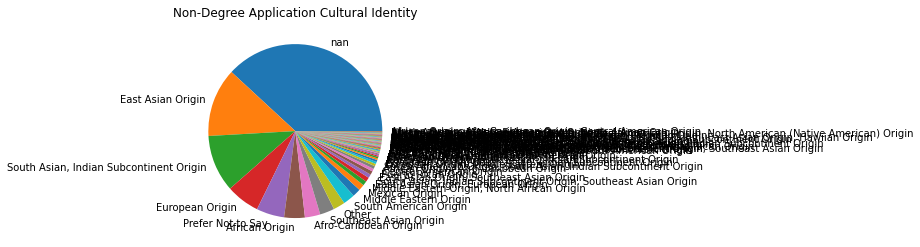

In [128]:
#plot pie
feature = 'Non-Degree Application Cultural Identity'
plt.pie(arise_df_informative[feature].value_counts(dropna=False), labels = arise_df_informative[feature].value_counts(dropna=False).index)
plt.title(feature)
plt.show()

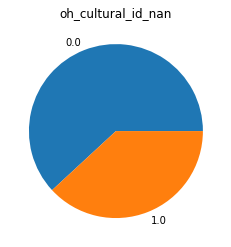

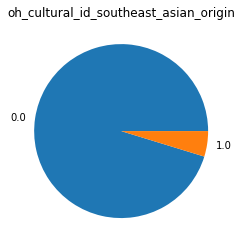

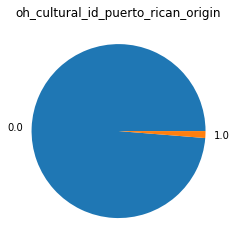

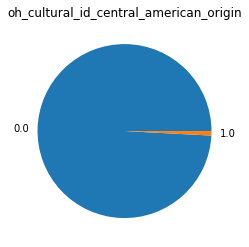

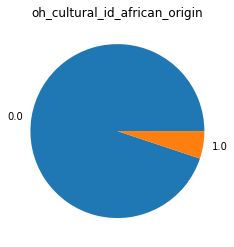

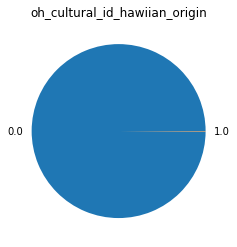

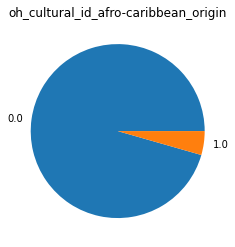

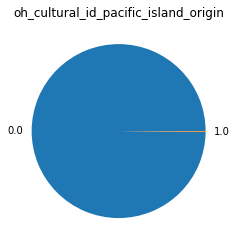

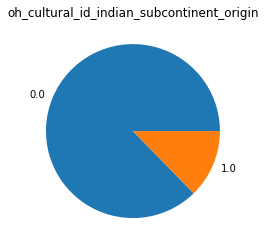

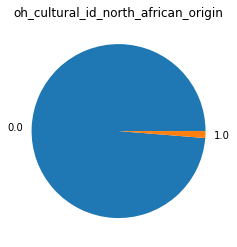

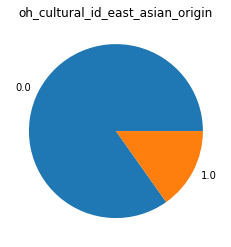

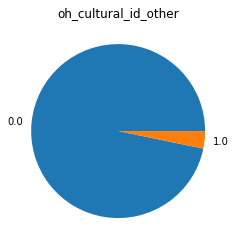

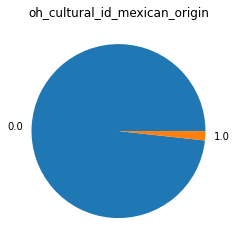

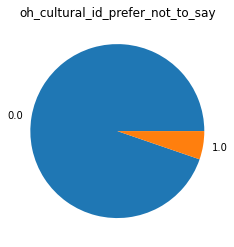

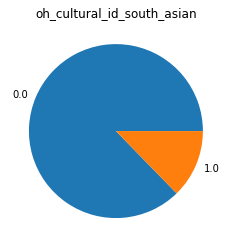

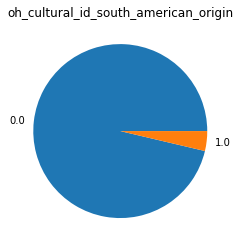

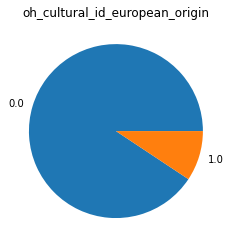

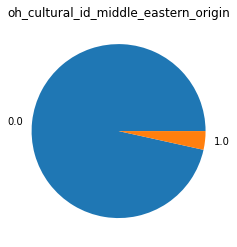

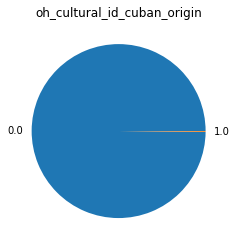

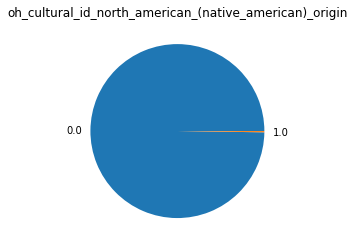

In [129]:
#plot pie
for culture in cultural_id_split_list:
  if isinstance(culture, str):
    culture = "oh_cultural_id_" + culture.lower().replace(' ', '_')
  else:
    culture = 'oh_cultural_id_nan'
  feature = culture
  plt.pie(arise_df_informative[feature].value_counts(dropna=False), labels = arise_df_informative[feature].value_counts(dropna=False).index)
  plt.title(feature)
  plt.show()

## 2.5 'Culural Identity Other'
- Going to keep as is for now
- Basically Treat it as a Free Response
- Clear possible additional catagories are Jewish, Central Asian, and African American

In [130]:
#define list of cultural identi catagories
arise_df_informative_working = arise_df_informative.copy()
cultural_id_other_list = list(arise_df_informative_working['Non-Degree Application Cultural Identity Other'].value_counts(dropna=False).index)
cultural_id_other_split_list = []
for i in cultural_id_other_list:
  if isinstance(i, str):
    split = i.split(',')
    for category in split:
      cultural_id_other_split_list.append(category.strip())
  else:
    cultural_id_other_split_list.append(i)
cultural_id_other_split_list = list(set(cultural_id_other_split_list))
print('Cultural Id Other Catagories')
cultural_id_other_split_list

Cultural Id Other Catagories


[nan,
 'Caucasian',
 'Sephardi and Anatolian',
 '& Dominican',
 'Northeast Asian',
 'Indo-Caribbean',
 'black Hispanic',
 'Bi-racial (White and First Nations)',
 'Bolivian Origin',
 'Jewish',
 'Eastern European/ Asia (Russian)',
 'American Indian',
 'Central Asian (Uzbek)',
 'afro-latina',
 'Haitian',
 'our culture and language are very unique and do not fit any category above',
 'Mix of more than one Eastern European',
 'African-American',
 'East Indian',
 'Korean and America (Britain)',
 'Uzbek',
 'Central Asian Origin (Bukharian)',
 'African American',
 'West Indian',
 'Iranian/Turkic',
 'My family comes from Uzbekistan',
 'Russian Mongolian',
 'Central Asian Origin',
 'South Asian/Bangladesh',
 'Afghan',
 'Chinese-White',
 'Central Asian',
 'Russian',
 'South American Origin & Central American Origin',
 'central asian',
 'Carribean descent',
 'Peruvian Origin',
 'Eurasian',
 'Southern African American',
 'Asian American',
 'Domincan Ecuadorian Origin',
 'French',
 'Irish',
 'which 

# 2.6 Gender Identity

* No Change for now

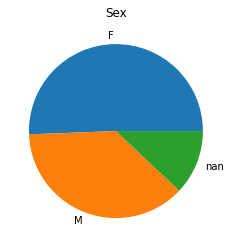

In [99]:
feature = 'Sex'
plt.pie(arise_df_informative[feature].value_counts(dropna=False), labels = arise_df_informative[feature].value_counts(dropna=False).index)
plt.title(feature)
plt.show()

In [135]:
arise_df_informative_working = arise_df_informative.copy()

arise_df_informative_working['std_sex'] = arise_df_informative_working['Sex']
arise_df_informative_working['std_sex'] = arise_df_informative_working['std_sex'].apply(lambda row: standardize_row(row))
arise_df_informative = arise_df_informative_working.copy()

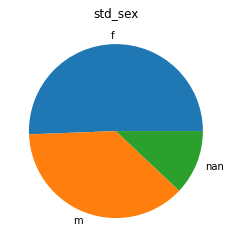

In [136]:
feature = 'std_sex'
plt.pie(arise_df_informative[feature].value_counts(dropna=False), labels = arise_df_informative[feature].value_counts(dropna=False).index)
plt.title(feature)
plt.show()

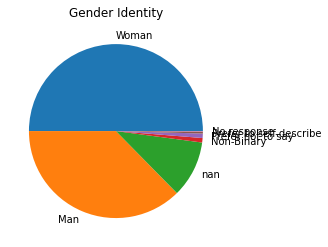

In [137]:
feature = 'Gender Identity'
plt.pie(arise_df_informative[feature].value_counts(dropna=False), labels = arise_df_informative[feature].value_counts(dropna=False).index)
plt.title(feature)
plt.show()

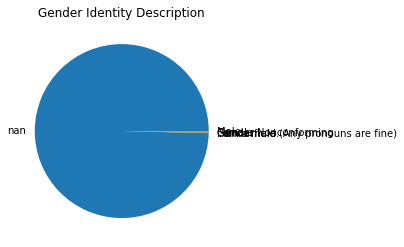

In [138]:
feature = 'Gender Identity Description'
plt.pie(arise_df_informative[feature].value_counts(dropna=False), labels = arise_df_informative[feature].value_counts(dropna=False).index)
plt.title(feature)
plt.show()

## 2.7 Geographical Demographics
  - Left the same
  * potentially worth hot encoding after



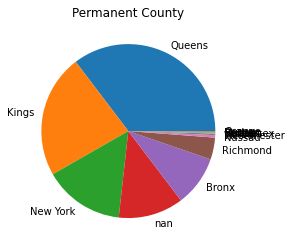

In [139]:
# arise_df_informative['Permanent County'].value_counts(dropna=False)
feature = 'Permanent County'
plt.pie(arise_df_informative[feature].value_counts(dropna=False), labels = arise_df_informative[feature].value_counts(dropna=False).index)
plt.title(feature)
plt.show()

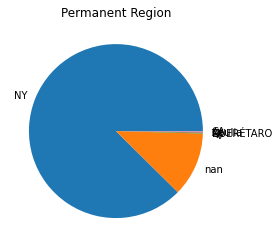

In [141]:
feature = 'Permanent Region'
plt.pie(arise_df_informative[feature].value_counts(dropna=False), labels = arise_df_informative[feature].value_counts(dropna=False).index)
plt.title(feature)
plt.show()

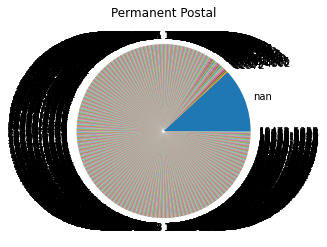

In [142]:
feature = 'Permanent Postal'
plt.pie(arise_df_informative[feature].value_counts(dropna=False), labels = arise_df_informative[feature].value_counts(dropna=False).index)
plt.title(feature)
plt.show()

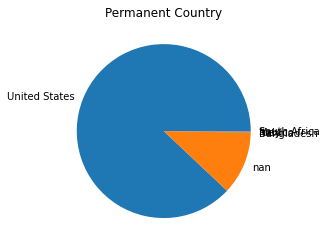

In [143]:
feature = 'Permanent Country'
plt.pie(arise_df_informative[feature].value_counts(dropna=False), labels = arise_df_informative[feature].value_counts(dropna=False).index)
plt.title(feature)
plt.show()

## 2.6 School Id
- Map codes to names using school code data set.  

In [144]:
school_codes_dict=dict(zip(school_codes_df['HIGH SCHOOL CODE'].astype(str), school_codes_df['HIGH SCHOOL']))
def school_codes_map(code, school_codes_dict):
  if code in school_codes_dict:
    return school_codes_dict[code]
  else:
    return float('nan')

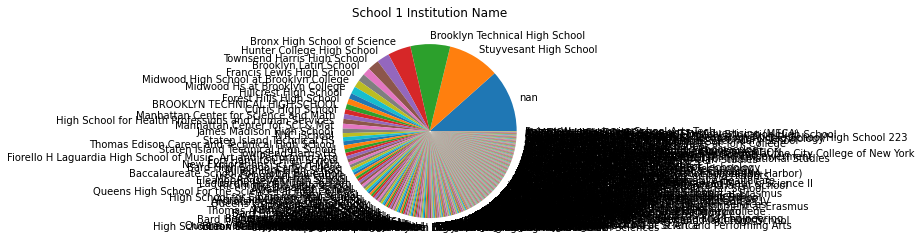

In [145]:
# list(arise_df_informative['School 1 Institution Name'].value_counts(dropna=False).sort_index().index)
feature = 'School 1 Institution Name'
plt.pie(arise_df_informative[feature].value_counts(dropna=False), labels = arise_df_informative[feature].value_counts(dropna=False).index)
plt.title(feature)
plt.show()

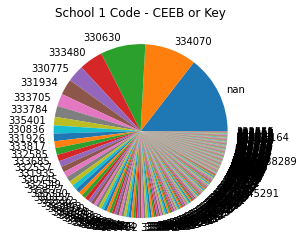

In [146]:
# arise_df_informative['School 1 Code - CEEB or Key'].value_counts(dropna=False)
# list(arise_df_informative['School 1 Institution Name'].value_counts(dropna=False).sort_index().index)
feature = 'School 1 Code - CEEB or Key'
plt.pie(arise_df_informative[feature].value_counts(dropna=False), labels = arise_df_informative[feature].value_counts(dropna=False).index)
plt.title(feature)
plt.show()

In [149]:
arise_df_informative_school = arise_df_informative.copy()
# arise_df_informative_school['school_std'] = arise_df_informative_school['School 1 Code - CEEB or Key']
arise_df_informative_school['std_school'] = arise_df_informative_school['School 1 Code - CEEB or Key'].apply(lambda row: school_codes_map(row, school_codes_dict))

arise_df_informative_school['std_school'] = arise_df_informative_school['std_school'].apply(lambda row: standardize_row(row))

arise_df_informative = arise_df_informative_school

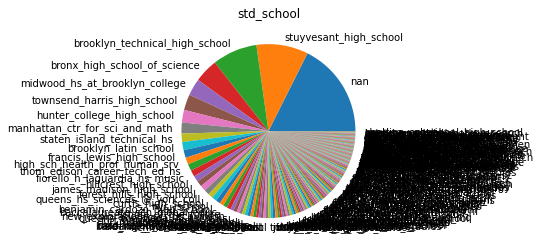

In [150]:
feature = 'std_school'
plt.pie(arise_df_informative[feature].value_counts(dropna=False), labels = arise_df_informative[feature].value_counts(dropna=False).index)
plt.title(feature)
plt.show()

## 2.8 GPA
*   Convert anything above 10 to 4 point scale by subtracting 60, dividing by 10 and setting a floor at 0
* Subject specifci GPA is too messy to standardize
* Consider looking and different GPA buckets
* Consider parsing the Subject Specific data

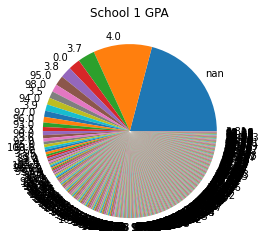

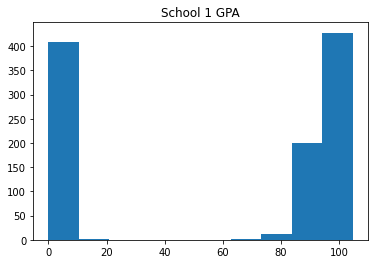

In [151]:
feature = 'School 1 GPA'
plt.pie(arise_df_informative[feature].value_counts(dropna=False), labels = arise_df_informative[feature].value_counts(dropna=False).index)
plt.title(feature)
plt.show()

plt.hist(arise_df_informative[feature])
plt.title(feature)
plt.show()

In [152]:

def gpa_scaling(gpa):
  if isinstance(gpa, (int,float)):
    if (gpa >4) & (gpa<=10):
      return 4
    elif gpa >10:
      if gpa > 93:
        return 4.
      elif gpa > 90:
        return 3.7
      elif gpa >87:
        return 3.3
      elif gpa >83:
        return 3.
      elif gpa >80:
        return 2.7
      elif gpa > 77:
        return 2.3
      elif gpa > 73:
        return 2.
      elif gpa >70:
        return 1.7
      elif gpa >67:
        return 1.3
      elif gpa > 63:
        return 1.
      elif gpa > 60:
        return .7
      else:
        return 0.0
      # return(min(max((gpa - 60)/ 10,0),4))
    else:
      return gpa
  else:
    return pd.NA      

In [153]:
arise_df_informative_gpa = arise_df_informative.copy()
# arise_df_informative_school['school_std'] = arise_df_informative_school['School 1 Code - CEEB or Key']
arise_df_informative_gpa['std_gpa'] = arise_df_informative_gpa['School 1 GPA'].apply(lambda row: gpa_scaling(row))

arise_df_informative = arise_df_informative_gpa.copy()

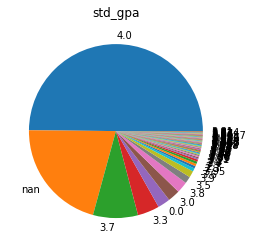

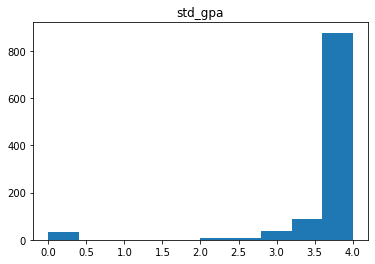

In [154]:
feature = 'std_gpa'
plt.pie(arise_df_informative[feature].value_counts(dropna=False), labels = arise_df_informative[feature].value_counts(dropna=False).index)
plt.title(feature)
plt.show()

plt.hist(arise_df_informative[feature])
plt.title(feature)
plt.show()

In [155]:
def extract_floats(s):
  if isinstance(s,str):
    ext_float_list = re.findall('\d*\.?\d+',s)
    scaled_float_list = []
    if len(ext_float_list) == 0:
      return float('nan')
    for extracted_number in ext_float_list:
      gpa = float(extracted_number)
      if (gpa >4) & (gpa<=10):
        scaled_float_list.append(4)
        return 4
      elif gpa >10:
        if gpa > 93:
          scaled_float_list.append(4.0)
        elif gpa > 90:
          scaled_float_list.append(3.7)
        elif gpa >87:
          scaled_float_list.append(3.3)
        elif gpa >83:
          scaled_float_list.append(3.0)
        elif gpa >80:
          scaled_float_list.append(2.7)
        elif gpa > 77:
          scaled_float_list.append(2.3)
        elif gpa > 73:
          scaled_float_list.append(2.0)
        elif gpa >70:
          scaled_float_list.append(1.7)
        elif gpa >67:
          scaled_float_list.append(1.3)
        elif gpa > 63:
          scaled_float_list.append(1.0)
        elif gpa > 60:
          scaled_float_list.append(0.7)
        else:
          scaled_float_list.append(0.0)
      else:
        return gpa
    return sum(scaled_float_list)/len(scaled_float_list)
  return s

In [157]:
import re 

feature = 'Non-Degree Application GPA in Specified Subjects'
arise_df_informative_gpa_specified = arise_df_informative.copy()
# arise_df_informative_school['school_std'] = arise_df_informative_school['School 1 Code - CEEB or Key']
arise_df_informative_gpa_specified['std_gpa_specified'] = arise_df_informative_gpa_specified[feature].apply(lambda row: extract_floats(row))
arise_df_informative = arise_df_informative_gpa_specified.copy()

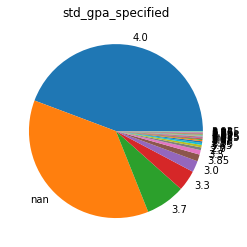

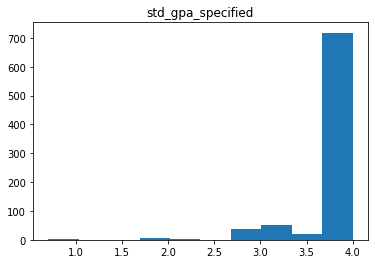

In [158]:
feature = 'std_gpa_specified'
plt.pie(arise_df_informative[feature].value_counts(dropna=False), labels = arise_df_informative[feature].value_counts(dropna=False).index)
plt.title(feature)
plt.show()


plt.hist(arise_df_informative[feature])
plt.title(feature)
plt.show()

## 2.9 Areas of Interest

* Very Clean Data


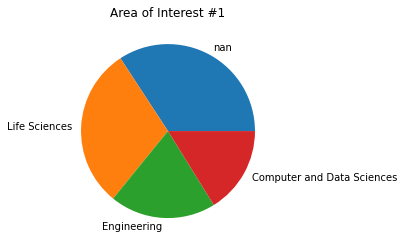

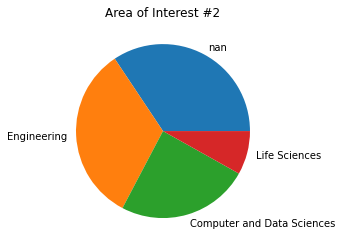

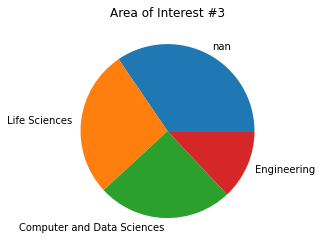

In [159]:
feature = 'Area of Interest #1'
plt.pie(arise_df_informative[feature].value_counts(dropna=False), labels = arise_df_informative[feature].value_counts(dropna=False).index)
plt.title(feature)
plt.show()

feature = 'Area of Interest #2'
plt.pie(arise_df_informative[feature].value_counts(dropna=False), labels = arise_df_informative[feature].value_counts(dropna=False).index)
plt.title(feature)
plt.show()

feature = 'Area of Interest #3'
plt.pie(arise_df_informative[feature].value_counts(dropna=False), labels = arise_df_informative[feature].value_counts(dropna=False).index)
plt.title(feature)
plt.show()

## 2.10 NYU Other

* Course participation - low engagment not sure what it is.  Leave as i
* Prior NYU application - Assume it means if you've applied to ARISE before.  Well documents. Leave as it
* Non-NYU stem participation.  Messy No way to standardize.  Good feature to suggest data collection techniques.
*binarize participation

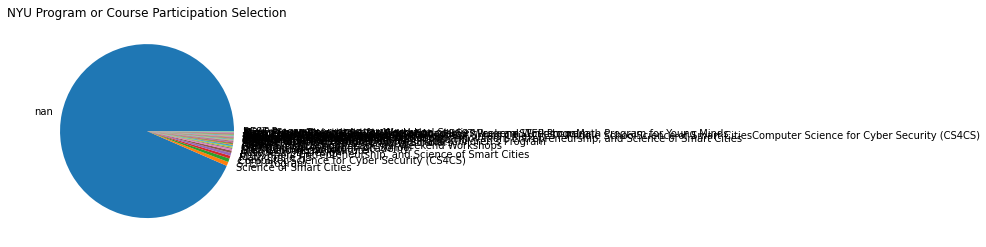

In [160]:
feature = 'NYU Program or Course Participation Selection'
plt.pie(arise_df_informative[feature].value_counts(dropna=False), labels = arise_df_informative[feature].value_counts(dropna=False).index)
plt.title(feature)
plt.show()

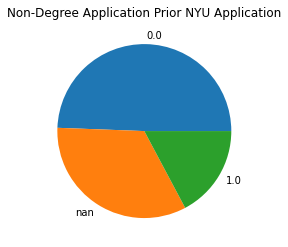

CategoricalIndex([0.0, nan, 1.0], categories=[0.0, 1.0], ordered=False, dtype='category')


In [161]:
feature = 'Non-Degree Application Prior NYU Application'
plt.pie(arise_df_informative[feature].value_counts(dropna=False), labels = arise_df_informative[feature].value_counts(dropna=False).index)
plt.title(feature)
plt.show()
print(arise_df_informative[feature].value_counts(dropna=False).index)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


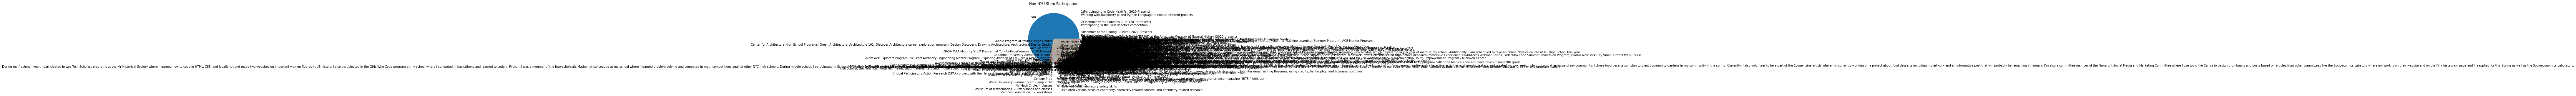

In [162]:
feature = 'Non-NYU Stem Participation'
plt.pie(arise_df_informative[feature].value_counts(dropna=False), labels = arise_df_informative[feature].value_counts(dropna=False).index)
plt.title(feature)
plt.show()

In [163]:
feature = 'Non-NYU Stem Participation'

arise_df_informative_non_nyu_stem = arise_df_informative.copy()
# arise_df_informative_school['school_std'] = arise_df_informative_school['School 1 Code - CEEB or Key']
arise_df_informative_non_nyu_stem['oh_non_nyu_stem'] = arise_df_informative_non_nyu_stem[feature].notna().astype(float)

arise_df_informative = arise_df_informative_non_nyu_stem.copy()

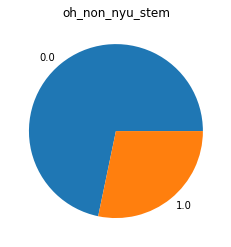

In [164]:
feature = 'oh_non_nyu_stem'
plt.pie(arise_df_informative[feature].value_counts(dropna=False), labels = arise_df_informative[feature].value_counts(dropna=False).index)
plt.title(feature)
plt.show()

## 2.11 Missing items
* Missing reference, application, and transcript where one hot encoded in their own category

In [165]:
feature = 'All Missing Checklist Items (comma)'
arise_df_informative[feature].value_counts(dropna=False)

NaN                                                                                                                                    696
Application                                                                                                                            342
Application, Transcript (Official or Unofficial): Stuyvesant High School                                                                14
Application, Transcript (Official or Unofficial): Brooklyn Technical High School                                                        10
Application, Transcript (Official or Unofficial): Bronx High School of Science                                                           8
                                                                                                                                      ... 
Reference: Stephanie Lim, Convent of the Sacred Heart                                                                                    1
Reference: Arthur Lashiker,

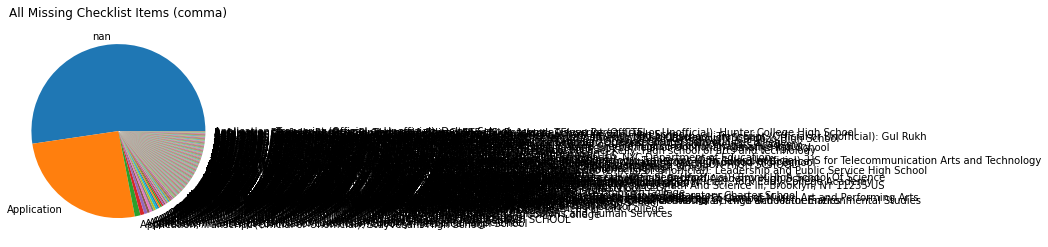

In [166]:
feature = 'All Missing Checklist Items (comma)'
plt.pie(arise_df_informative[feature].value_counts(dropna=False), labels = arise_df_informative[feature].value_counts(dropna=False).index)
plt.title(feature)
plt.show()

In [167]:
row_list = []
for row in arise_df_informative['All Missing Checklist Items (comma)']:
  if isinstance(row,str):
    test_split = row.split(',')
    missing_item_list = []
    for missing_item in test_split:
      missing_item = missing_item.strip()
      colon_loc = missing_item.find(':')
      if colon_loc > 0: 
        missing_item_list.append(missing_item[:colon_loc])
      else:
        missing_item_list.append(missing_item)
    row_list.append(missing_item_list)
 
  else:
     row_list.append(row)




arise_df_informative_missing = arise_df_informative.copy()
arise_df_informative_missing['std_missing_list'] = pd.Series(row_list)
arise_df_informative = arise_df_informative_missing.copy()

In [168]:
def missing_od_isin(missing_item, missing_item_list):
  if isinstance(missing_item_list, list):
    if missing_item in (missing_item_list):
      return 1
    else:
      return 0
  else:
    return 0

test_list = arise_df_informative.std_missing_list[2]
test_item = 'References'
missing_od_isin(test_item, test_list)

missing_items_oi = ['Application', 'Reference',  'Transcript (Official or Unofficial)']

for missin_item_oi in missing_items_oi:
  arise_df_informative_missing_oh = arise_df_informative.copy()
  
  arise_df_informative_missing_oh['oh_missing_{}'.format(missin_item_oi.lower().replace(' ','_'))] = arise_df_informative_missing_oh.std_missing_list.apply(lambda row: missing_od_isin(missin_item_oi,row))
  arise_df_informative = arise_df_informative_missing_oh.copy()

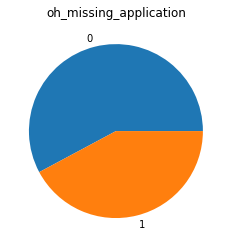

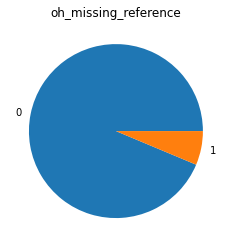

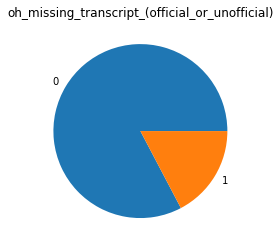

In [169]:
#plot pie
for missin_item_oi in missing_items_oi:
  feature = missin_item_oi
  plt.pie(arise_df_informative['oh_missing_{}'.format(missin_item_oi.lower().replace(' ','_'))].value_counts(dropna=False), labels = arise_df_informative['oh_missing_{}'.format(missin_item_oi.lower().replace(' ','_'))].value_counts(dropna=False).index)
  plt.title('oh_missing_{}'.format(missin_item_oi.lower().replace(' ','_')))
  plt.show()

# 3. Encode Data

In [170]:
arise_df_informative.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 67 columns):
 #   Column                                                  Non-Null Count  Dtype         
---  ------                                                  --------------  -----         
 0   Unique Identifier                                       1330 non-null   int64         
 1   Non-Degree Application SIS Decision                     768 non-null    object        
 2   App Started Date                                        1329 non-null   object        
 3   App Submitted Date                                      768 non-null    object        
 4   Race                                                    992 non-null    object        
 5   Hispanic                                                893 non-null    object        
 6   Non-Degree Application Cultural Identity                823 non-null    object        
 7   Non-Degree Application Cultural Identity Other          43 n

In [171]:
from sklearn.preprocessing import OneHotEncoder

#copy df
df = arise_df_informative.copy()

oh_feature_list = ['std_race',
                   'Hispanic',
                   'Sex',
                   'Non-Degree Application Family Income Range',
                   'Non-Degree Application Parent College Education',
                   'std_school'
                   ]

oh_feature_name_dict = {'std_race':'oh_race',
                        'Hispanic':'oh_hispanic',                        
                        'Sex':'oh_sex',
                        'Non-Degree Application Family Income Range':'oh_income',
                        'Non-Degree Application Parent College Education':'oh_parent_education',
                        'std_school':'oh_school'
                        }

encoder = OneHotEncoder(handle_unknown='ignore')
encoded_array = encoder.fit_transform(df[oh_feature_list]).toarray()
encoded_cat_dict = dict(zip(oh_feature_list,encoder.categories_))


#create columns names
oh_col_names = []
for k,v in encoded_cat_dict.items():
  prefix = oh_feature_name_dict[k]
  for j in v:
    if isinstance(j,str):
      col_name = j.lower().replace(' ', '_')
      col_name = prefix + "_" + col_name
    else:
      col_name = prefix + '_nan'
    oh_col_names.append(col_name)

encoded_df = pd.DataFrame(encoded_array, columns= oh_col_names)

df_concat = pd.concat([df, encoded_df], axis=1)
arise_df_informative = df_concat.copy()


In [172]:
df = arise_df_informative.copy()

orig_col_names = ['Unique Identifier ',
 'Non-Degree Application SIS Decision',
 'App Started Date',
 'App Submitted Date',
 'Race',
 'Hispanic',
 'Non-Degree Application Cultural Identity',
 'Non-Degree Application Cultural Identity Other',
 'Sex',
 'Gender Identity',
 'Gender Identity Description',
 'Non-Degree Application Family Income Range',
 'Non-Degree Application Parent College Education',
 'Permanent City',
 'Permanent County',
 'Permanent Region',
 'Permanent Postal',
 'Permanent Country',
 'Emergency Contact Type 1',
 'Emergency Contact Type 2',
 'Non-Degree Application Current Grade Level',
 'School 1 Institution Name',
 'School 1 Code - CEEB or Key',
 'School 1 GPA',
 'Non-Degree Application GPA in Specified Subjects',
 'Area of Interest #1',
 'Area of Interest #2',
 'Area of Interest #3',
 'NYU Program or Course Participation Selection',
 'Non-Degree Application Prior NYU Application',
 'Non-NYU Stem Participation',
 'All Missing Checklist Items (comma)',]

mapper = {}
for n in orig_col_names:
  new_n = re.sub('[^A-Za-z0-9]+', '', n)
  mapper[str(n)] = f'orig_{new_n}'
df.rename(columns=mapper, inplace=True)

df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 295 columns):
 #    Column                                                  Non-Null Count  Dtype         
---   ------                                                  --------------  -----         
 0    orig_UniqueIdentifier                                   1330 non-null   int64         
 1    orig_NonDegreeApplicationSISDecision                    768 non-null    object        
 2    orig_AppStartedDate                                     1329 non-null   object        
 3    orig_AppSubmittedDate                                   768 non-null    object        
 4    orig_Race                                               992 non-null    object        
 5    orig_Hispanic                                           893 non-null    object        
 6    orig_NonDegreeApplicationCulturalIdentity               823 non-null    object        
 7    orig_NonDegreeApplicationCulturalIdentityOther   

In [195]:
import datetime

arise_output_path = os.path.join(project_directory_path, "data/{}_ARISE_processed_data_2021.csv".format(datetime.date.today()))
arise_output_path
arise_df_informative.to_csv(arise_output_path)